<a href="https://colab.research.google.com/github/daffavcd/PCVK-2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Mounted at /content/drive


# CREATE HISTO

<BarContainer object of 256 artists>

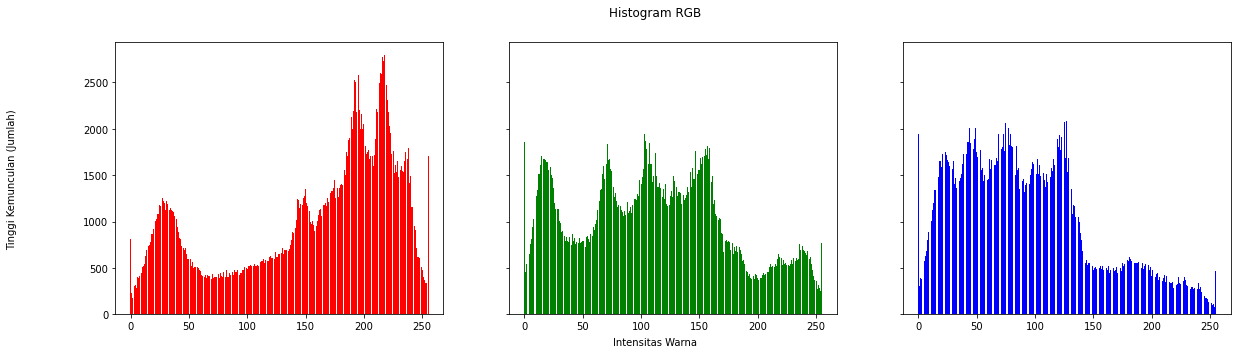

In [4]:
img = cv.imread('/content/drive/MyDrive/ImagesCV/lena.jpg')

x, y, z = np.shape(img)
names = np.arange(256)

histoBlue = [0]*256
histoGreen = [0]*256
histoRed = [0]*256

for h in range(0,x):
  for w in range(0,y):
    histoBlue[img[h][w][0]]+=1
    histoGreen[img[h][w][1]]+=1
    histoRed[img[h][w][2]]+=1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.text(0.05, 0.5, 'Tinggi Kemunculan (Jumlah)', va='center', rotation='vertical')
fig.text(0.5, 0.04,'Intensitas Warna', ha='center')
fig.suptitle('Histogram RGB')

axs[0].bar(names, histoRed, color='red')
axs[1].bar(names, histoGreen, color='green')
axs[2].bar(names, histoBlue, color='blue')

# HISTO NUMPY

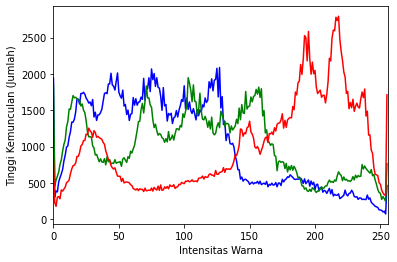

In [5]:
colors = ('b','g','r')
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:,:, channel_id], bins=256, range=(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel('Intensitas Warna')
plt.ylabel('Tinggi Kemunculan (Jumlah)')

plt.show()

# Histo Equalization

# LENA

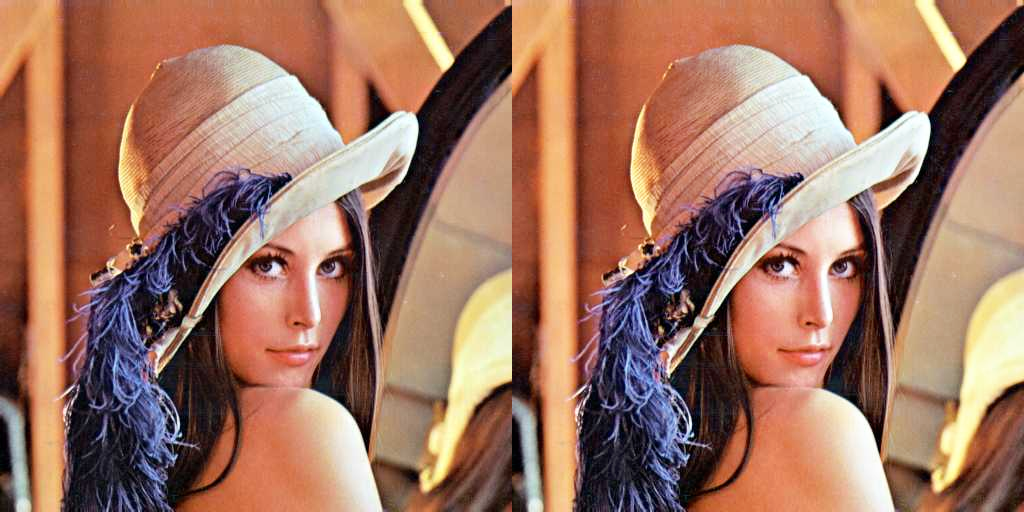

<BarContainer object of 256 artists>

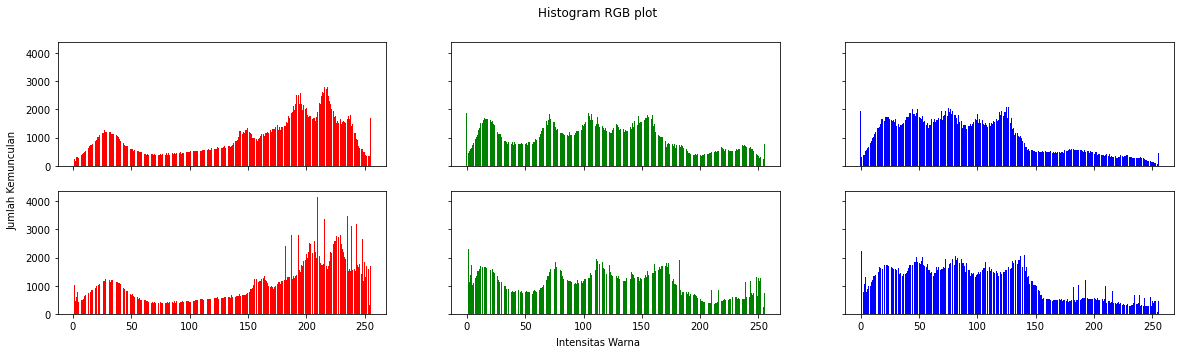

In [6]:
img1 = cv.imread('/content/drive/MyDrive/ImagesCV/lena.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for h in range(0,height):
    for w in range(0,width):
      ax[0][img1[h][w][0]] += 1
      ax[1][img1[h][w][1]] += 1
      ax[2][img1[h][w][2]] += 1
  return ax

histo_ori = histog(img1)

img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange(256)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_ori[2], color='red')
axs[0,1].bar(names, histo_ori[1], color='green')
axs[0,2].bar(names, histo_ori[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

# LENA LC

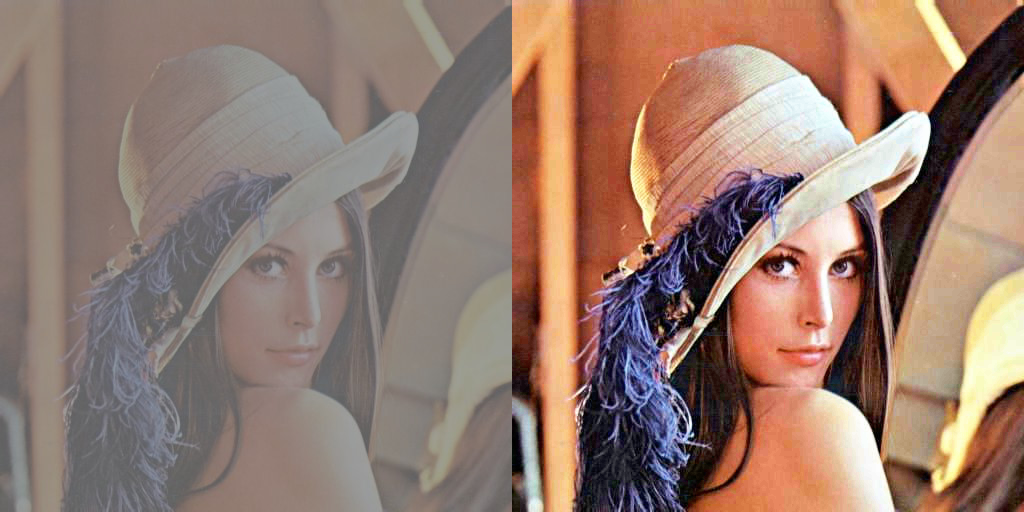

<BarContainer object of 256 artists>

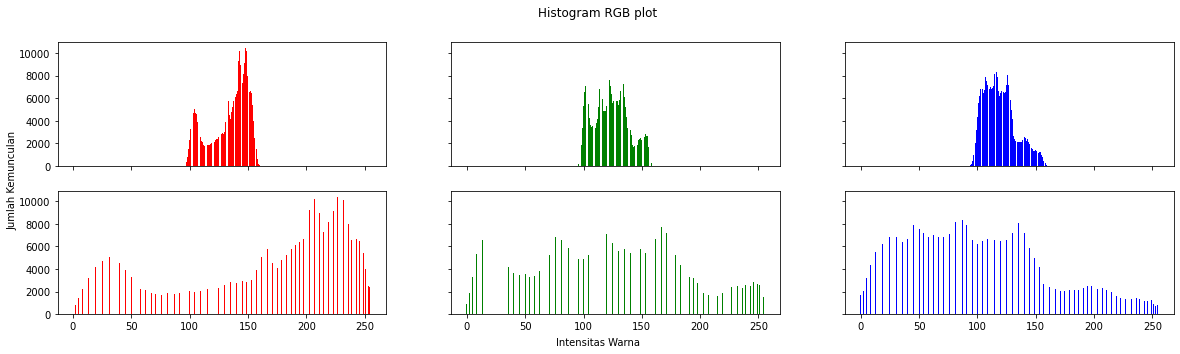

In [10]:
imgLenaLC = cv.imread('/content/drive/MyDrive/ImagesCV/lena_lc.jpg')
def histog(imgLenaLC):
  height, width, depth = np.shape(imgLenaLC)
  ax = np.zeros((3,256))
  for h in range(0,height):
    for w in range(0,width):
      ax[0][imgLenaLC[h][w][0]] += 1
      ax[1][imgLenaLC[h][w][1]] += 1
      ax[2][imgLenaLC[h][w][2]] += 1
  return ax

histo_ori = histog(imgLenaLC)

img_array = np.asarray(imgLenaLC)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img3 = eq_img_array

equal_histo = histog(img3)

final_frame = cv.hconcat((imgLenaLC, img3))
cv2_imshow(final_frame)

names = np.arange(256)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_ori[2], color='red')
axs[0,1].bar(names, histo_ori[1], color='green')
axs[0,2].bar(names, histo_ori[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')